In [31]:
import os
import random 
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [32]:
train_data_dir = 'Training/'
train_categories = os.listdir(train_data_dir)
train_categories

['covid', 'normal', 'virus']

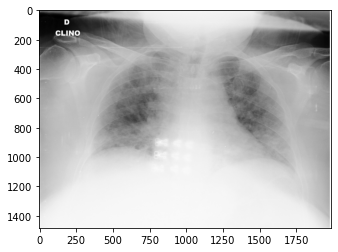

In [33]:
for category in train_categories:
  path = os.path.join(train_data_dir, category)
  for image in os.listdir(path):
    img = cv.imread(os.path.join(path, image))
    plt.imshow(img)
    plt.show()
    break
  break

In [34]:
train_data = []

def create_train_data():
  for category in train_categories:
    path = os.path.join(train_data_dir, category)
    class_num = train_categories.index(category)
    for image in os.listdir(path):
      img = cv.imread(os.path.join(path, image))
      img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
      img = cv.resize(img, (224, 224))
      train_data.append([img, class_num])



create_train_data()

In [35]:
len(train_data)

1823

In [36]:
random.shuffle(train_data)

In [37]:
X_train = []
y_train = []

for data in train_data:
  features = data[0]
  labels = data[1]

  X_train.append(features)
  y_train.append(labels)


In [38]:
X_train = np.array(X_train)/255
y_train = np.array(y_train)

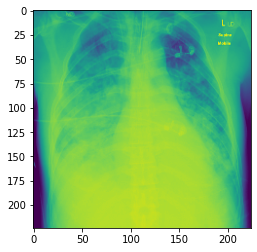

In [39]:
plt.imshow(X_train[0])
plt.show()

In [40]:
X_train[0]

array([[0.34901961, 0.35686275, 0.35294118, ..., 0.42745098, 0.42745098,
        0.43137255],
       [0.38823529, 0.37647059, 0.37254902, ..., 0.44705882, 0.45098039,
        0.45098039],
       [0.38823529, 0.38823529, 0.39215686, ..., 0.47058824, 0.46666667,
        0.46666667],
       ...,
       [0.01960784, 0.01960784, 0.01960784, ..., 0.06666667, 0.04313725,
        0.01960784],
       [0.01960784, 0.01960784, 0.01960784, ..., 0.06666667, 0.04313725,
        0.01960784],
       [0.01960784, 0.01960784, 0.01960784, ..., 0.06666667, 0.04313725,
        0.01960784]])

In [41]:
y_train[0]

0

In [46]:
model = Sequential()

In [47]:
model.add(Conv2D(32, (3,3), input_shape = (224,224,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(X_train, y_train, batch_size=10, epochs=3)

Epoch 1/3
183/183 [==============================] - 621s 3s/step - loss: 0.5397 - accuracy: 0.7811
Epoch 2/3
183/183 [==============================] - 585s 3s/step - loss: 0.2736 - accuracy: 0.9084
Epoch 3/3
183/183 [==============================] - 576s 3s/step - loss: 0.1916 - accuracy: 0.9342


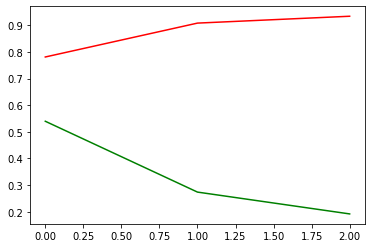

In [50]:
plt.plot(history.history['accuracy'], color='red', label='Accuracy')
plt.plot(history.history['loss'], color='green', label='loss')
plt.show()

In [51]:
model.evaluate(X_train, y_train)

57/57 [==============================] - 175s 3s/step - loss: 0.1961 - accuracy: 0.9331


[0.19607485830783844, 0.933077335357666]

In [52]:
model.save('CovidModel.h5')